In [7]:
# Imports

from random import *
from math import *
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import csv
import copy

Nombre total de noeuds =210
Nombre de noeuds decrits =156
Nombre de liens =390


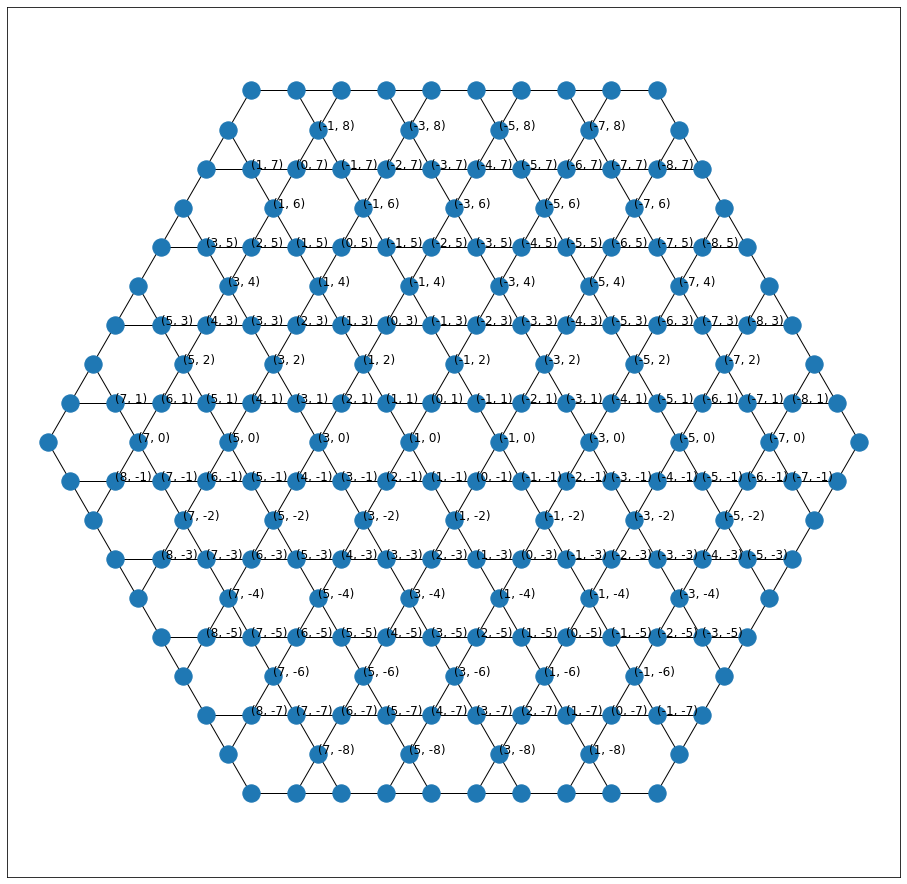

In [11]:
# Definition of the graph

l0 = 1.0

L = 10 # Lreal = L-1 

def nCouronne(L):
    # Nombres de noeuds en 0 et la couronne L inclue
    
    N = 1 # Central nodes
    for l in range(L):
        N = N + 6*l # Ring k contains 6k nodes

    return(N)

N = nCouronne(L)
Nmat = nCouronne(L-1)

G = nx.Graph(directed=False)
G.add_node((0,0))
pos = {}
pos[(0,0)] = (0,0)

for n in range(L):
    
    list = copy.deepcopy(G.nodes())
    
    for (q,r) in list:
        
        G.add_edge((q,r),(q-1,r))
        pos[(q-1,r)] = (pos[(q,r)][0] + l0,pos[(q,r)][1])
        
        G.add_edge((q,r),(q-1,r+1))
        pos[(q-1,r+1)] = (pos[(q,r)][0] + l0*cos(pi/3),pos[(q,r)][1] + l0*sin(pi/3))
        
        G.add_edge((q,r),(q,r+1))
        pos[(q,r+1)] = (pos[(q,r)][0] + l0*cos(2*pi/3),pos[(q,r)][1] + l0*sin(2*pi/3))
        
        G.add_edge((q,r),(q+1,r))
        pos[(q+1,r)] = (pos[(q,r)][0] - l0,pos[(q,r)][1])
        
        G.add_edge((q,r),(q+1,r-1))
        pos[(q+1,r-1)] = (pos[(q,r)][0] + l0*cos(4*pi/3),pos[(q,r)][1] + l0*sin(4*pi/3))
        
        G.add_edge((q,r),(q,r-1))
        pos[(q,r-1)] = (pos[(q,r)][0] + l0*cos(5*pi/3),pos[(q,r)][1] + l0*sin(5*pi/3))

remove = [node for node,degree in dict(G.degree()).items() if degree <= 2]
G.remove_nodes_from(remove)

for node in remove:
    del pos[node]
    
# Kagome specific nodes which have to be removed

rmCount = 0

for j in range(-L+1, L):
    if j < 0 and j%2 == 0:
        for i in range(-L+1-j,L):
            
            if i%2 == 0:
            
                G.remove_node((i,j))
                pos.pop((i,j))
                
                rmCount += 1
            
    if j >= 0 and j%2 == 0:
        for i in range(-L+1,L-j):
            
            if i%2 == 0:
            
                G.remove_node((i,j))
                pos.pop((i,j))
                
                rmCount += 1
            
N = N - rmCount
Nmat = Nmat - rmCount

print('Nombre total de noeuds ='+str(N))
print('Nombre de noeuds decrits ='+str(Nmat))
    
# Pratical functions for graph use

def index2tuple(pos,i):
    # Return the tuple corresponding to node index i
    return [i for i in pos.keys()][i]

def tuple2index(pos,tuple):
    # Return the index corresponding to node tuple
    return [i for i in pos.keys()].index(tuple)

print('Nombre de liens ='+str(len([e for e in G.edges])))

X = []
Y = []
for i in range(N):
    X.append(pos[index2tuple(pos,i)][0])
    Y.append(pos[index2tuple(pos,i)][1])
X = np.array(X[0:], dtype=float)
Y = np.array(Y[0:], dtype=float)

plt.figure(figsize=(16,16))
nx.draw_networkx(G, pos, with_labels=False)
for i in range(Nmat):
    plt.text(X[i], Y[i], index2tuple(pos,i), fontsize=12, color='black')
plt.axis('equal')
plt.show()

In [14]:
alpha=1.02 # Mechanical tension

# Dynamical matrix definition

S = np.zeros([2*N,2*N])

for i in range(N):
    for neighbors in [p for p in G.neighbors(index2tuple(pos,i))]:
        j = tuple2index(pos,neighbors)
        S[2*i,2*j] = (X[i] - X[j])*(X[i] - X[j])
        S[2*i+1,2*j+1] = (Y[i] - Y[j])*(Y[i] - Y[j])
        S[2*i+1,2*j] = (Y[i] - Y[j])*(X[i] - X[j])
        S[2*i,2*j+1] = (X[i] - X[j])*(Y[i] - Y[j])
    S[2*i, 2*i] = -sum(S[2*i, 0::2])
    S[2*i+1, 2*i+1] = -sum(S[2*i+1, 1::2])
    S[2*i+1, 2*i] = -sum(S[2*i+1, 0::2])
    S[2*i, 2*i+1] = -sum(S[2*i, 1::2])
   
S = -S

dS = np.zeros([2*N,2*N])
M = np.zeros([2*N,2*N])

for i in range(N):
    Zi=0
    for neighbors in [p for p in G.neighbors(index2tuple(pos,i))]:
        j = tuple2index(pos,neighbors)
        dS[2*i,2*j] = (1/alpha)-1
        dS[2*i+1,2*j+1] = (1/alpha)-1
        Zi = Zi+1
    dS[2*i, 2*i] = Zi-(Zi/alpha)
    dS[2*i+1, 2*i+1] = Zi-(Zi/alpha)

M = (1/alpha)*S + dS

S = M

In [15]:
S = np.delete(S, [i for i in range(2*Nmat,2*N)], axis=0)
S = np.delete(S, [i for i in range(2*Nmat,2*N)], axis=1)

In [16]:
eigenvalues, eigenvectors = np.linalg.eigh(S)

print ("eigs =",eigenvalues,"\n")
print ("eig\teigenvector" )
for iter in range(Nmat-1):
    vec = eigenvectors[:,iter]
    print (eigenvalues[iter],"\t",vec,"\t",sum(vec),"\n")

eigs = [0.04198446 0.04198446 0.05636491 0.07926272 0.07926272 0.0823844
 0.0823844  0.08268748 0.08412133 0.08655456 0.08655456 0.09377395
 0.09377395 0.09559262 0.09751415 0.09751415 0.09778979 0.11458709
 0.11458709 0.11476189 0.11612246 0.11641437 0.11641437 0.13985311
 0.14832113 0.15544519 0.15969791 0.15969791 0.16238118 0.16238118
 0.1812717  0.1836942  0.18840828 0.18840828 0.18930382 0.18930382
 0.22539719 0.22601744 0.22601744 0.22811797 0.22811797 0.22931358
 0.27008655 0.27259574 0.27259574 0.27673677 0.27673677 0.27891696
 0.28097872 0.29456001 0.29456001 0.29845872 0.29845872 0.30622607
 0.31667314 0.3310508  0.33981414 0.33981414 0.34713762 0.34713762
 0.41141304 0.41211452 0.41211452 0.41830369 0.41830369 0.43984846
 0.43984846 0.44369231 0.44419192 0.44419192 0.44912587 0.46169451
 0.49931283 0.50183582 0.50183582 0.52451198 0.52642254 0.52642254
 0.55902521 0.55902521 0.56459164 0.58692419 0.58692419 0.60573011
 0.60660956 0.60660956 0.63676685 0.63676685 0.63978172 

 -5.19918789e-02  3.01136898e-02  8.02098364e-03 -5.63432749e-03] 	 1.0780785986153063e-13 

0.18840828348274902 	 [-1.00193924e-02 -6.89726054e-15 -1.07000707e-02  3.92989815e-04
 -1.07000707e-02 -3.92989815e-04 -1.00193924e-02  4.82686807e-15
 -1.07000707e-02  3.92989815e-04 -1.07000707e-02 -3.92989815e-04
 -8.70671000e-03  2.22227687e-03 -8.70671000e-03 -2.22227687e-03
 -1.25558064e-02 -8.98586761e-16 -8.70671000e-03 -2.22227687e-03
 -8.70671000e-03  2.22227687e-03 -1.25558064e-02 -2.47545040e-15
  1.76703044e-01 -3.25939796e-13 -4.57072063e-03 -3.42116919e-02
 -4.57072063e-03  3.42116919e-02 -3.39077869e-02  1.97938919e-02
 -3.39077869e-02 -1.97938919e-02 -9.54809123e-04  1.02570810e-01
 -6.75307268e-03 -1.59614725e-03 -6.75307268e-03  1.59614725e-03
 -9.54809123e-04 -1.02570810e-01 -3.39077869e-02 -1.97938919e-02
 -4.57072063e-03  3.42116919e-02  1.76703044e-01  3.03920155e-13
 -4.57072063e-03 -3.42116919e-02 -3.39077869e-02  1.97938919e-02
 -9.54809123e-04  1.02570810e-01 -6.7530


0.8226873742472395 	 [-7.84864708e-02 -1.49186219e-15 -3.92432354e-02 -6.79712776e-02
  3.92432354e-02 -6.79712776e-02  7.84864708e-02 -4.16333634e-16
  3.92432354e-02  6.79712776e-02 -3.92432354e-02  6.79712776e-02
 -5.44016051e-02 -3.14087813e-02 -5.44016051e-02  3.14087813e-02
 -1.42941214e-15 -6.28175627e-02  5.44016051e-02 -3.14087813e-02
  5.44016051e-02  3.14087813e-02  2.63244287e-15  6.28175627e-02
  9.11137862e-02 -1.52655666e-16 -3.89704258e-02 -6.13215924e-02
 -3.89704258e-02  6.13215924e-02 -7.25912697e-02 -3.08858253e-03
 -7.25912697e-02  3.08858253e-03  4.55568931e-02  7.89068535e-02
  3.36208439e-02 -6.44101749e-02 -3.36208439e-02 -6.44101749e-02
 -4.55568931e-02  7.89068535e-02  7.25912697e-02 -3.08858253e-03
  3.89704258e-02 -6.13215924e-02 -9.11137862e-02 -4.44975045e-18
  3.89704258e-02  6.13215924e-02  7.25912697e-02  3.08858253e-03
 -4.55568931e-02 -7.89068535e-02 -3.36208439e-02  6.44101749e-02
  3.36208439e-02  6.44101749e-02  4.55568931e-02 -7.89068535e-02
  3

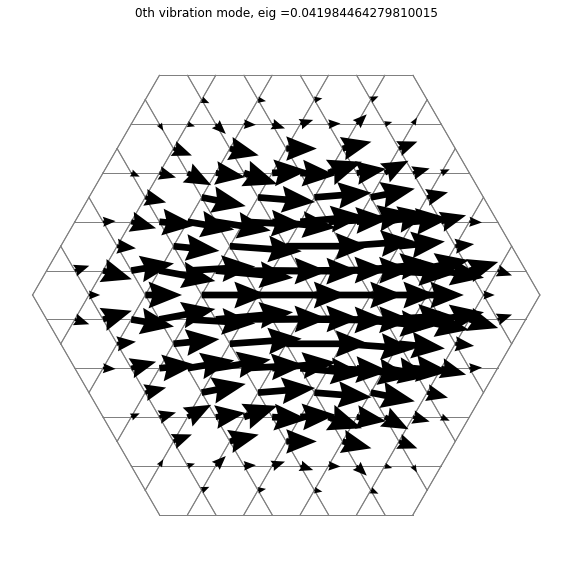

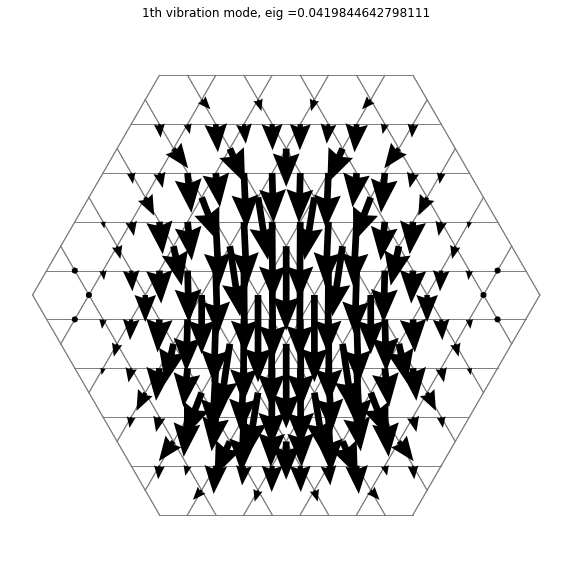

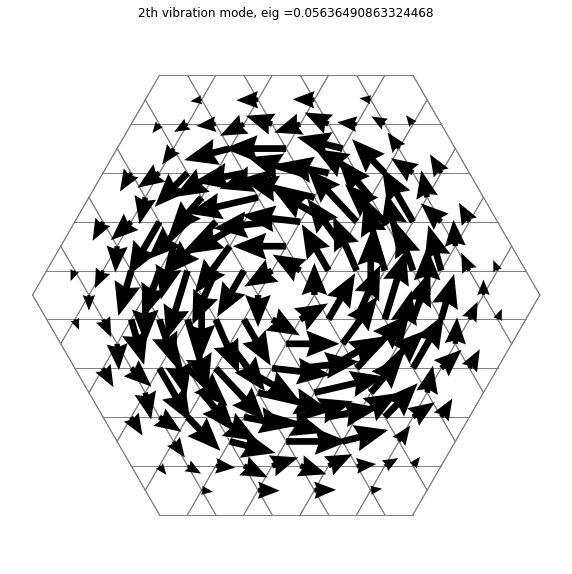

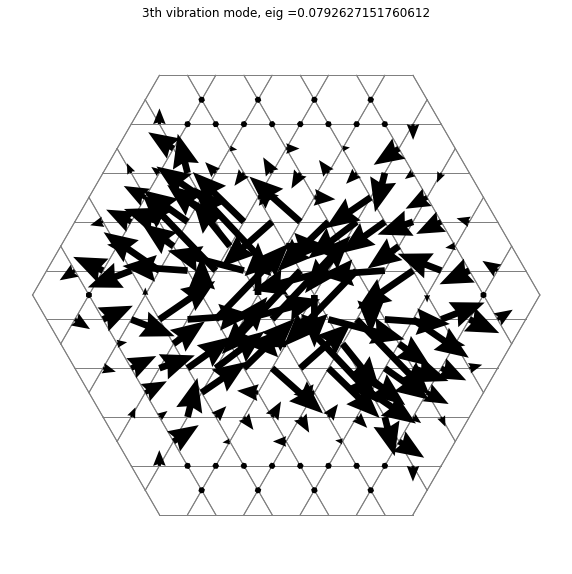

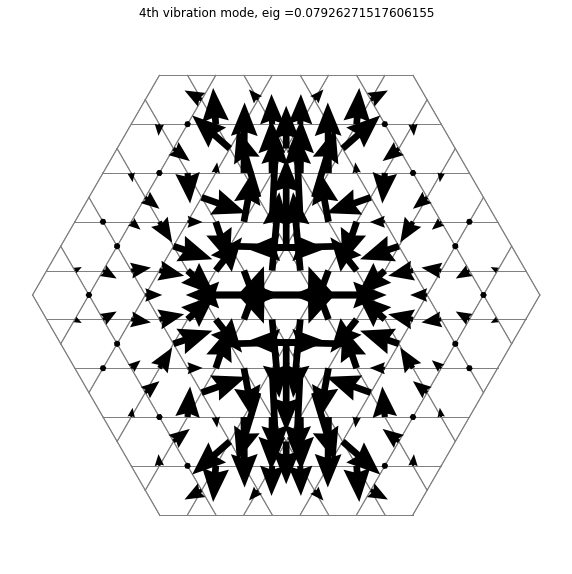

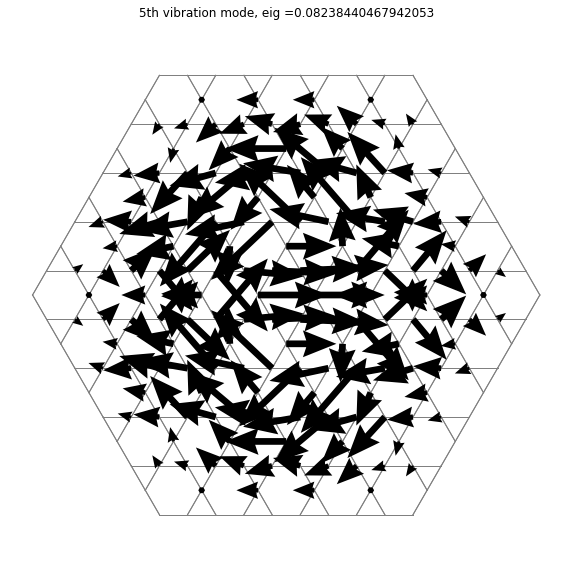

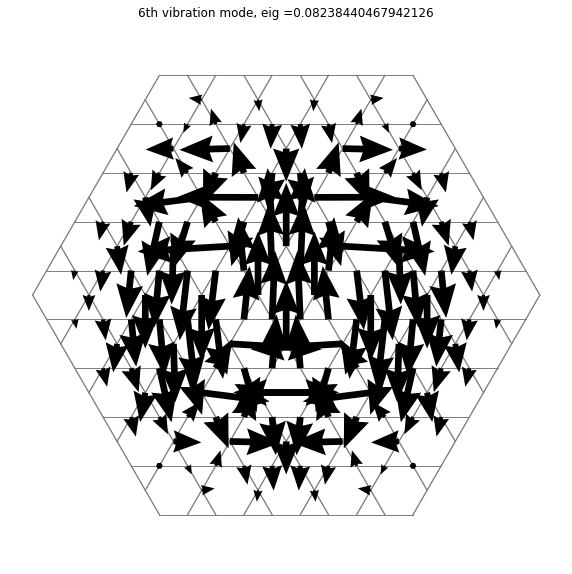

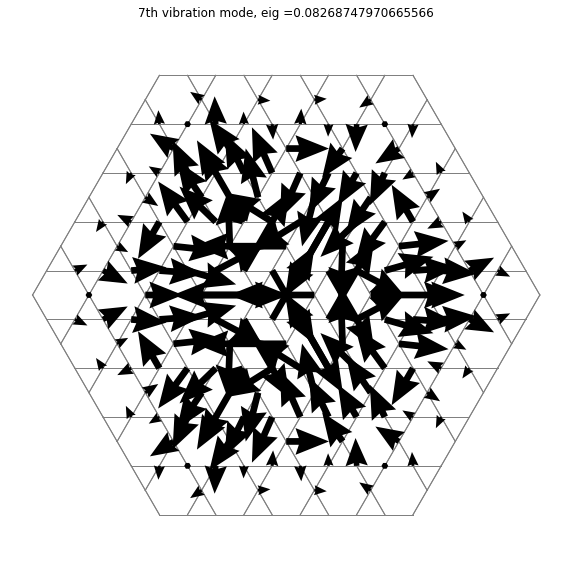

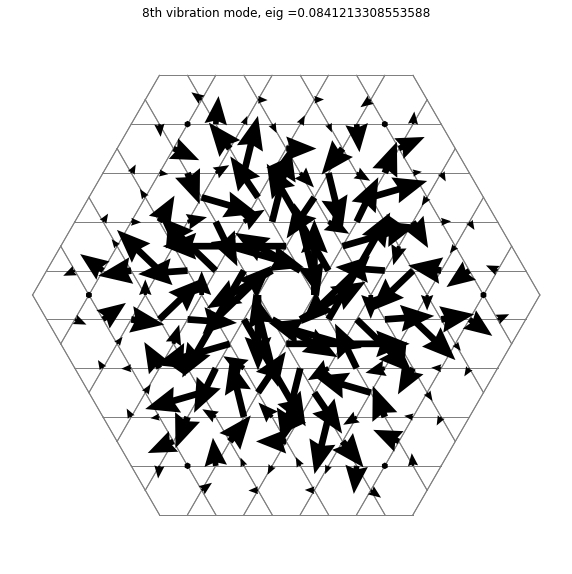

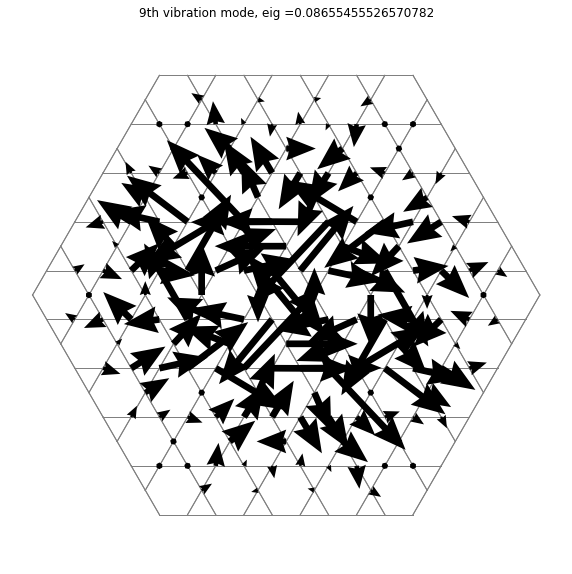

In [17]:
for i in range(10): # Show ten first modes
    
    eig_tmp = eigenvectors[:,i]
    ux = eig_tmp[0::2]
    uy = eig_tmp[1::2]

    fig = plt.figure(figsize=(10,10))
    
    plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
    for l in range(N):
        for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
            j = tuple2index(pos,neighbors)
            plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
    plt.quiver(X[:Nmat], Y[:Nmat], ux[:], uy[:],zorder=10^6, width=0.012, scale=1.0, linewidth=5.0, headwidth=4)
    xmin, xmax, ymin, ymax = plt.axis("equal")
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(str(i)+'th vibration mode, eig ='+str(eigenvalues[i]))
    plt.show()

In [18]:
def makeRotationMatrix(theta):
    
    sig = np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]], dtype=float)
    
    return(sig)

def createMapping(X, Y):
    
    # Rotation
    
    sig = makeRotationMatrix(pi/3)
    mappingRot = {}
    
    for i in range(Nmat):
        
        Xr, Yr = np.dot(sig, [X[i], Y[i]])
        distij = []
        
        for j in range(Nmat):
            
            dist_ = sqrt((X[j] - Xr)**2 + (Y[j] - Yr)**2)
            distij.append(dist_)
            
        min_value = min(distij)
        min_index = distij.index(min_value)
        
        mappingRot[i] = min_index
            
    # Reflection
    
    mappingRefl = {}
    
    for i in range(Nmat):
        
        Xr, Yr = X[i], -Y[i]
        distij = []
        
        for j in range(Nmat):
            
            dist_ = sqrt((X[j] - Xr)**2 + (Y[j] - Yr)**2)
            distij.append(dist_)
            
        min_value = min(distij)
        min_index = distij.index(min_value)
        
        mappingRefl[i] = min_index
    
    return(mappingRot, mappingRefl)

mappingRot, mappingRefl = createMapping(X, Y)
print(mappingRot)
print(mappingRefl)

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 0, 6: 8, 7: 6, 8: 9, 9: 10, 10: 11, 11: 7, 12: 17, 13: 18, 14: 15, 15: 19, 16: 13, 17: 20, 18: 21, 19: 22, 20: 23, 21: 24, 22: 25, 23: 26, 24: 27, 25: 28, 26: 29, 27: 16, 28: 14, 29: 12, 30: 34, 31: 32, 32: 35, 33: 30, 34: 36, 35: 37, 36: 38, 37: 39, 38: 40, 39: 41, 40: 33, 41: 31, 42: 51, 43: 52, 44: 49, 45: 53, 46: 47, 47: 54, 48: 45, 49: 55, 50: 43, 51: 56, 52: 57, 53: 58, 54: 59, 55: 60, 56: 61, 57: 62, 58: 63, 59: 64, 60: 65, 61: 66, 62: 67, 63: 68, 64: 69, 65: 70, 66: 71, 67: 50, 68: 48, 69: 46, 70: 44, 71: 42, 72: 78, 73: 76, 74: 79, 75: 74, 76: 80, 77: 72, 78: 81, 79: 82, 80: 83, 81: 84, 82: 85, 83: 86, 84: 87, 85: 88, 86: 89, 87: 77, 88: 75, 89: 73, 90: 103, 91: 104, 92: 101, 93: 105, 94: 99, 95: 106, 96: 97, 97: 107, 98: 95, 99: 108, 100: 93, 101: 109, 102: 91, 103: 110, 104: 111, 105: 112, 106: 113, 107: 114, 108: 115, 109: 116, 110: 117, 111: 118, 112: 119, 113: 120, 114: 121, 115: 122, 116: 123, 117: 124, 118: 125, 119: 126, 120: 127, 121:

In [19]:
def reflection(Nmat, vec):
    
    mapping = mappingRefl

    reflectedVec = np.zeros(2*Nmat)
    
    for i in range(Nmat):
        
        ui_reflected = [vec[2*i], -vec[2*i+1]]
        
        reflectedVec[2*mapping[i]:2*mapping[i]+2] = ui_reflected
        
    return reflectedVec
    
def rotation(Nmat, vec, ang):
    
    mapping = mappingRot
    
    rotatedVec = np.zeros(2*Nmat)
    
    sig = makeRotationMatrix(ang)
    
    for i in range(Nmat):
        
        ui = [vec[2*i], vec[2*i+1]]
        ui_rotated = np.dot(sig,ui)
        
        rotatedVec[2*mapping[i]:2*mapping[i]+2] = ui_rotated
        
    return rotatedVec

def scalarProduct(vec1, vec2):
    
    scPr = 0
    
    ux1 = vec1[0::2]
    uy1 = vec1[1::2]
    
    ux2 = vec2[0::2]
    uy2 = vec2[1::2]
    
    scPr = np.sum(ux1*ux2 + uy1*uy2)
    
    return scPr

In [20]:
RotationSym = []
ReflectionSym = []

for i in range(2*Nmat):
    
    print(i)
    
    # -------------------------------------------------------------------------------------
    # Uncomment the following to also plot the modes (might slow down drastically the code)
    # -------------------------------------------------------------------------------------
    
    #eig_tmp = eigenvectors[:,i]
    #ux = eig_tmp[0::2]
    #uy = eig_tmp[1::2]

    #fig = plt.figure(figsize=(12,4))
    
    #plt.subplot(1,3,1)
    
    #plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
    #for l in range(N):
    #    for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
    #        j = tuple2index(pos,neighbors)
    #        plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
    #plt.quiver(X[:Nmat], Y[:Nmat], ux[:], uy[:],zorder=10^6, width=0.012, scale=3.5, linewidth=5.0, headwidth=4)
    #xmin, xmax, ymin, ymax = plt.axis("equal")
    #plt.xticks([])
    #plt.yticks([])
    #plt.axis('off')
    #plt.title(str(i)+'th vibration mode, eig ='+str(eigenvalues[i]))
    
    #eig_tmp = rotation(Nmat, eigenvectors[:,i], pi/3)
    #ux = eig_tmp[0::2]
    #uy = eig_tmp[1::2]
    
    #plt.subplot(1,3,2)
    
    #plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
    #for l in range(N):
    #    for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
    #        j = tuple2index(pos,neighbors)
    #        plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
    #plt.quiver(X[:Nmat], Y[:Nmat], ux[:], uy[:],zorder=10^6, width=0.012, scale=3.5, linewidth=5.0, headwidth=4)
    #xmin, xmax, ymin, ymax = plt.axis("equal")
    #plt.xticks([])
    #plt.yticks([])
    #plt.axis('off')
    #plt.title(r'rotated from $\pi/3$')

    #plt.savefig('EPC_'+str(i)+'.pdf')
    
    #eig_tmp = reflection(Nmat, eigenvectors[:,i])
    #ux = eig_tmp[0::2]
    #uy = eig_tmp[1::2]
    
    #plt.subplot(1,3,3)
    
    #plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
    #for l in range(N):
    #    for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
    #        j = tuple2index(pos,neighbors)
    #        plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
    #plt.quiver(X[:Nmat], Y[:Nmat], ux[:], uy[:],zorder=10^6, width=0.012, scale=3.5, linewidth=5.0, headwidth=4)
    #xmin, xmax, ymin, ymax = plt.axis("equal")
    #plt.xticks([])
    #plt.yticks([])
    #plt.axis('off')
    #plt.title(r'reflection with (y=0)')

    #plt.savefig('EPC_'+str(i)+'.pdf')
    
    #plt.show()
    
    RotationSym_ = scalarProduct(eigenvectors[:,i],rotation(Nmat, eigenvectors[:,i], pi/3))
    ReflectionSym_ = scalarProduct(eigenvectors[:,i],reflection(Nmat, eigenvectors[:,i]))
    
    RotationSym.append(RotationSym_)
    ReflectionSym.append(ReflectionSym_)
    
    print('Scalar product of the mode with itself:')
    print(scalarProduct(eigenvectors[:,i],eigenvectors[:,i])) 
    print('Scalar product of the mode with itself rotated from pi/3:')
    print(RotationSym_)
    print('Scalar product of the mode reflected:')
    print(ReflectionSym_)

0
Scalar product of the mode with itself:
0.9999999999999997
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999999
Scalar product of the mode reflected:
0.9999999999999997
1
Scalar product of the mode with itself:
0.9999999999999993
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999998
Scalar product of the mode reflected:
-0.9999999999999994
2
Scalar product of the mode with itself:
0.9999999999999989
Scalar product of the mode with itself rotated from pi/3:
0.9999999999999989
Scalar product of the mode reflected:
-0.9999999999999989
3
Scalar product of the mode with itself:
0.9999999999999996
Scalar product of the mode with itself rotated from pi/3:
-0.4999999999999997
Scalar product of the mode reflected:
-0.9999999999938979
4
Scalar product of the mode with itself:
1.0000000000000007
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000003
Scalar product of the mode reflected:
0.9999999999938991
5
Scalar product of 

Scalar product of the mode with itself:
1.0000000000000002
Scalar product of the mode with itself rotated from pi/3:
-0.5
Scalar product of the mode reflected:
-1.0000000000000002
77
Scalar product of the mode with itself:
0.9999999999999994
Scalar product of the mode with itself rotated from pi/3:
-0.49999999999999967
Scalar product of the mode reflected:
0.9999999999999993
78
Scalar product of the mode with itself:
0.9999999999999996
Scalar product of the mode with itself rotated from pi/3:
-0.49999999999999967
Scalar product of the mode reflected:
-0.9999999999999993
79
Scalar product of the mode with itself:
1.0000000000000004
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000002
Scalar product of the mode reflected:
1.0000000000000004
80
Scalar product of the mode with itself:
0.9999999999999996
Scalar product of the mode with itself rotated from pi/3:
-0.9999999999999996
Scalar product of the mode reflected:
-0.9999999999999996
81
Scalar product of the mod

Scalar product of the mode with itself:
1.0000000000000009
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000004
Scalar product of the mode reflected:
0.9999904488893804
161
Scalar product of the mode with itself:
1.0000000000000002
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000001
Scalar product of the mode reflected:
-0.99999044888938
162
Scalar product of the mode with itself:
1.0000000000000013
Scalar product of the mode with itself rotated from pi/3:
-1.0000000000000013
Scalar product of the mode reflected:
-1.0000000000000013
163
Scalar product of the mode with itself:
1.0000000000000002
Scalar product of the mode with itself rotated from pi/3:
0.5
Scalar product of the mode reflected:
0.9617173835669696
164
Scalar product of the mode with itself:
0.9999999999999992
Scalar product of the mode with itself rotated from pi/3:
0.49999999999999967
Scalar product of the mode reflected:
-0.9617173835669692
165
Scalar product of the mode 

Scalar product of the mode with itself:
0.9999999999999992
Scalar product of the mode with itself rotated from pi/3:
-0.49999999999999967
Scalar product of the mode reflected:
0.9999999999999996
233
Scalar product of the mode with itself:
1.0000000000000009
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000006
Scalar product of the mode reflected:
-1.0000000000000009
234
Scalar product of the mode with itself:
0.9999999999999998
Scalar product of the mode with itself rotated from pi/3:
-0.9999999999999998
Scalar product of the mode reflected:
-0.9999999999999999
235
Scalar product of the mode with itself:
0.9999999999999993
Scalar product of the mode with itself rotated from pi/3:
0.49999999999999967
Scalar product of the mode reflected:
-0.9999999999999993
236
Scalar product of the mode with itself:
1.0000000000000013
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000006
Scalar product of the mode reflected:
1.0000000000000013
237
Scalar 

Scalar product of the mode with itself:
0.999999999999999
Scalar product of the mode with itself rotated from pi/3:
-0.49999999999999944
Scalar product of the mode reflected:
0.999999999999999
292
Scalar product of the mode with itself:
0.9999999999999996
Scalar product of the mode with itself rotated from pi/3:
-0.4999999999999999
Scalar product of the mode reflected:
-0.9999999999999998
293
Scalar product of the mode with itself:
0.9999999999999993
Scalar product of the mode with itself rotated from pi/3:
0.9999999999999992
Scalar product of the mode reflected:
0.9999999999999992
294
Scalar product of the mode with itself:
1.0000000000000009
Scalar product of the mode with itself rotated from pi/3:
1.000000000000001
Scalar product of the mode reflected:
-1.000000000000001
295
Scalar product of the mode with itself:
1.0000000000000013
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000006
Scalar product of the mode reflected:
-1.000000000000001
296
Scalar produc

In [21]:
for i in range(2*Nmat):
    print(i, eigenvalues[i])
    print("Rotation symmetry : ", RotationSym[i])
    print("Reflection symmetry : ", ReflectionSym[i])
    print('')

0 0.041984464279810015
Rotation symmetry :  0.4999999999999999
Reflection symmetry :  0.9999999999999997

1 0.0419844642798111
Rotation symmetry :  0.4999999999999998
Reflection symmetry :  -0.9999999999999994

2 0.05636490863324468
Rotation symmetry :  0.9999999999999989
Reflection symmetry :  -0.9999999999999989

3 0.0792627151760612
Rotation symmetry :  -0.4999999999999997
Reflection symmetry :  -0.9999999999938979

4 0.07926271517606155
Rotation symmetry :  -0.5000000000000003
Reflection symmetry :  0.9999999999938991

5 0.08238440467942053
Rotation symmetry :  0.49999999999999994
Reflection symmetry :  1.0

6 0.08238440467942126
Rotation symmetry :  0.5000000000000003
Reflection symmetry :  -1.0000000000000004

7 0.08268747970665566
Rotation symmetry :  -1.0
Reflection symmetry :  1.0

8 0.0841213308553588
Rotation symmetry :  0.9999999999999991
Reflection symmetry :  -0.999999999999999

9 0.08655455526570782
Rotation symmetry :  -0.499999999999999
Reflection symmetry :  -0.999999

Reflection symmetry :  0.9999999999999996

238 3.128625564655996
Rotation symmetry :  -0.5000000000000004
Reflection symmetry :  -1.0000000000000009

239 3.1290021883773163
Rotation symmetry :  0.9999999999999996
Reflection symmetry :  0.9999999999999996

240 3.147959750523218
Rotation symmetry :  0.9999999999999996
Reflection symmetry :  -0.9999999999999996

241 3.1679777341507225
Rotation symmetry :  0.49999999999999994
Reflection symmetry :  0.9999999999999999

242 3.1679777341507225
Rotation symmetry :  0.49999999999999967
Reflection symmetry :  -0.9999999999999994

243 3.1992980151836896
Rotation symmetry :  -1.0
Reflection symmetry :  1.0

244 3.2132826783959945
Rotation symmetry :  -0.5
Reflection symmetry :  -1.0

245 3.213282678395995
Rotation symmetry :  -0.5000000000000008
Reflection symmetry :  1.0000000000000013

246 3.245227243104532
Rotation symmetry :  0.49999999999999983
Reflection symmetry :  0.9999999999999596

247 3.2452272431045333
Rotation symmetry :  0.5000000000

In [22]:
def findSubSpace(eigenVal, eigenvalues, Nmat, delta=10E-12):
    
    subSpace = []
    
    for i in range(2*Nmat):
        if eigenVal < eigenvalues[i] + delta and eigenVal > eigenvalues[i] - delta:
            subSpace.append(i)
            
    return(subSpace)

def generateNewBasisReflection(subSpace, eigenvectors, Nmat):
    
    size = len(subSpace)
    C = np.zeros([size, size])
    
    for i in range(size):
        for j in range(size):
            C[i,j] = scalarProduct(eigenvectors[:,subSpace[j]], reflection(Nmat, eigenvectors[:,subSpace[i]]))

    eigenvalues_, eigenvectors_ = np.linalg.eig(C)
        
    vectors = np.zeros([2*Nmat, size])
    
    for i in range(size):
        for j in range(size):
            vectors[:,i] += eigenvectors_[j,i]*eigenvectors[:,subSpace[j]] 
        
    return(eigenvalues_, vectors)

def generateNewBasisRotation(subSpace, eigenvectors, Nmat):
    
    size = len(subSpace)
    C = np.zeros([size, size])
    
    for i in range(size):
        for j in range(size):
            C[i,j] = scalarProduct(eigenvectors[:,subSpace[j]], rotation(Nmat, eigenvectors[:,subSpace[i]], pi/3))
    
    eigenvalues_, eigenvectors_ = np.linalg.eig(C)

    print ("eigs =",eigenvalues_,"\n")
    print ("eig\teigenvector" )
    for iter in range(size):
        vec = eigenvectors_[:,iter]
        print (eigenvalues_[iter],"\t",vec,"\t",sum(vec),"\n")
        
    vectors = np.zeros([2*Nmat, size])
    
    for i in range(size):
        if eigenvalues_[i].imag == 0:
            for j in range(size):
                vectors[:,i] += eigenvectors_[j,i].real*eigenvectors[:,subSpace[j]] 
        else:
            vectors[:,i] = eigenvectors[:,subSpace[i]]
        
    return(eigenvalues_, vectors)

In [23]:
subSpaceList = {}

for eigs in eigenvalues:
    
    subSpace_ = findSubSpace(eigs, eigenvalues, Nmat)
    subSpaceList[eigs] = subSpace_
    
print(subSpaceList)

def cleanSubSpaceList(subSpaceList, Threshold=1E-12):
    
    subSpaceListReturn = {}
    
    for key, value in subSpaceList.items():
        
        cnt = 0
        
        for key_, value_ in subSpaceListReturn.items():
            
            if abs(key-key_) < Threshold:
                cnt += 1
            
        if cnt == 0:
                
            subSpaceListReturn[key] = value
                
    return(subSpaceListReturn)
                
subSpaceList = cleanSubSpaceList(subSpaceList)
print(subSpaceList)

print()
print([subSpaceList[key] for key, val in subSpaceList.items() if len(subSpaceList[key]) == 2])

print()
print([subSpaceList[key] for key, val in subSpaceList.items() if len(subSpaceList[key]) == 3])

print()
print([subSpaceList[key] for key, val in subSpaceList.items() if len(subSpaceList[key]) == 4])

{0.041984464279810015: [0, 1], 0.0419844642798111: [0, 1], 0.05636490863324468: [2], 0.0792627151760612: [3, 4], 0.07926271517606155: [3, 4], 0.08238440467942053: [5, 6], 0.08238440467942126: [5, 6], 0.08268747970665566: [7], 0.0841213308553588: [8], 0.08655455526570782: [9, 10], 0.08655455526570816: [9, 10], 0.09377395010991134: [11, 12], 0.0937739501099114: [11, 12], 0.09559261629262478: [13], 0.09751415164921455: [14, 15], 0.09751415164921468: [14, 15], 0.09778978695484457: [16], 0.11458708738507367: [17, 18], 0.1145870873850737: [17, 18], 0.11476189151891701: [19], 0.1161224569678356: [20], 0.11641436584073453: [21, 22], 0.11641436584073496: [21, 22], 0.13985310820455493: [23], 0.14832112701380398: [24], 0.15544518540464705: [25], 0.15969790999130162: [26, 27], 0.15969790999130173: [26, 27], 0.16238118342363572: [28, 29], 0.16238118342363594: [28, 29], 0.18127170356134478: [30], 0.18369420242091888: [31], 0.18840828348274902: [32, 33], 0.1884082834827491: [32, 33], 0.18930382024843

WARNING: In the case where there exist sub-spaces of dimension strictly greater than 2 (see console output above), the code below does not work

In [24]:
RotationSym = []
ReflectionSym = []

for key, value in subSpaceList.items():
    
    if len(value) == 1:
        
        print(value)
        i = value[0]
        
        # ---------------------
        # --- Plot the mode ---
        # ---------------------
        
        #fig = plt.figure(figsize=(4,4))
    
        #eig_tmp = eigenvectors[:,i]
        #ux = eig_tmp[0::2]
        #uy = eig_tmp[1::2]
    
        #plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
        #for l in range(N):
        #    for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
        #        j = tuple2index(pos,neighbors)
        #        plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
        #plt.quiver(X[:Nmat], Y[:Nmat], ux[:], uy[:],zorder=10^6, width=0.012, scale=3.5, linewidth=5.0, headwidth=4)
        #xmin, xmax, ymin, ymax = plt.axis("equal")
        #plt.xticks([])
        #plt.yticks([])
        #plt.axis('off')
    
        #plt.title(str(i)+'th vibration mode, eig ='+str(eigenvalues[i]))
        #plt.show()
        
        # ---------------------
        # ---------------------
        
        RotationSym_ = scalarProduct(eigenvectors[:,i],rotation(Nmat, eigenvectors[:,i], pi/3))
        ReflectionSym_ = scalarProduct(eigenvectors[:,i],reflection(Nmat, eigenvectors[:,i]))
        
        print('Scalar product of the mode with itself rotated from pi/3:')
        print(RotationSym_)
        print('Scalar product of the mode reflected:')
        print(ReflectionSym_)
    
        RotationSym.append(RotationSym_)
        ReflectionSym.append(ReflectionSym_)
        
        print('')
        
    elif len(value) == 2:
        
        print(value)
        
        eigs_refl, newVectors_refl = generateNewBasisReflection(value, eigenvectors, Nmat)
        
        for i in range(len(value)):
            
            print(value[i])
            
            eigenvectors[:,value[i]] = np.copy(newVectors_refl[:,i])
            
            # ---------------------
            # --- Plot the mode ---
            # ---------------------
        
            #fig = plt.figure(figsize=(4,4))
    
            #eig_tmp = eigenvectors[:,value[i]]
            #ux = eig_tmp[0::2]
            #uy = eig_tmp[1::2]
    
            #plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
            #for l in range(N):
            #    for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
            #        j = tuple2index(pos,neighbors)
            #        plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
            #plt.quiver(X[:Nmat], Y[:Nmat], ux[:], uy[:],zorder=10^6, width=0.012, scale=3.5, linewidth=5.0, headwidth=4)
            #xmin, xmax, ymin, ymax = plt.axis("equal")
            #plt.xticks([])
            #plt.yticks([])
            #plt.axis('off')
    
            #plt.title(str(value[i])+'th vibration mode, eig ='+str(eigenvalues[value[i]]))
            #plt.show()
        
            # ---------------------
            # ---------------------
            
            RotationSym_ = scalarProduct(eigenvectors[:,value[i]],rotation(Nmat, eigenvectors[:,value[i]], pi/3))
            ReflectionSym_ = scalarProduct(eigenvectors[:,value[i]],reflection(Nmat, eigenvectors[:,value[i]]))
        
            print('Scalar product of the mode with itself rotated from pi/3:')
            print(RotationSym_)
            print('Scalar product of the mode reflected:')
            print(ReflectionSym_)
            
            RotationSym.append(RotationSym_)
            ReflectionSym.append(ReflectionSym_)
            
            print('')
            
        print('')

[0, 1]
0
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999999
Scalar product of the mode reflected:
0.9999999999999997

1
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999998
Scalar product of the mode reflected:
-0.9999999999999994


[2]
Scalar product of the mode with itself rotated from pi/3:
0.9999999999999989
Scalar product of the mode reflected:
-0.9999999999999989

[3, 4]
3
Scalar product of the mode with itself rotated from pi/3:
-0.4999999999999996
Scalar product of the mode reflected:
-0.9999999999999993

4
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000003
Scalar product of the mode reflected:
1.0000000000000007


[5, 6]
5
Scalar product of the mode with itself rotated from pi/3:
0.5
Scalar product of the mode reflected:
1.0

6
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000002
Scalar product of the mode reflected:
-1.0000000000000004


[7]
Scalar product of the mode with its

Scalar product of the mode with itself rotated from pi/3:
0.5000000000000001
Scalar product of the mode reflected:
-1.0

94
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000001
Scalar product of the mode reflected:
1.0000000000000002


[95]
Scalar product of the mode with itself rotated from pi/3:
-0.9999999999999996
Scalar product of the mode reflected:
-0.9999999999999997

[96, 97]
96
Scalar product of the mode with itself rotated from pi/3:
-0.4999999999999998
Scalar product of the mode reflected:
-0.9999999999999994

97
Scalar product of the mode with itself rotated from pi/3:
-0.49999999999999944
Scalar product of the mode reflected:
0.9999999999999988


[98, 99]
98
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999991
Scalar product of the mode reflected:
-0.9999999999999981

99
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000001
Scalar product of the mode reflected:
1.0


[100]
Scalar product of the mode wit

Scalar product of the mode with itself rotated from pi/3:
0.5000000000000004
Scalar product of the mode reflected:
1.0000000000000009

161
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000002
Scalar product of the mode reflected:
-1.0000000000000004


[162]
Scalar product of the mode with itself rotated from pi/3:
-1.0000000000000013
Scalar product of the mode reflected:
-1.0000000000000013

[163, 164]
163
Scalar product of the mode with itself rotated from pi/3:
0.5
Scalar product of the mode reflected:
1.0

164
Scalar product of the mode with itself rotated from pi/3:
0.49999999999999956
Scalar product of the mode reflected:
-0.9999999999999992


[165, 166]
165
Scalar product of the mode with itself rotated from pi/3:
-0.5
Scalar product of the mode reflected:
-0.9999999999999998

166
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000002
Scalar product of the mode reflected:
1.0000000000000004


[167]
Scalar product of the mode with its

Scalar product of the mode with itself rotated from pi/3:
-0.4999999999999999
Scalar product of the mode reflected:
-0.9999999999999998


[293]
Scalar product of the mode with itself rotated from pi/3:
0.9999999999999992
Scalar product of the mode reflected:
0.9999999999999992

[294]
Scalar product of the mode with itself rotated from pi/3:
1.000000000000001
Scalar product of the mode reflected:
-1.000000000000001

[295, 296]
295
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000007
Scalar product of the mode reflected:
-1.000000000000001

296
Scalar product of the mode with itself rotated from pi/3:
-0.499999999999999
Scalar product of the mode reflected:
0.9999999999999982


[297]
Scalar product of the mode with itself rotated from pi/3:
-1.0000000000000007
Scalar product of the mode reflected:
-1.0000000000000007

[298, 299]
298
Scalar product of the mode with itself rotated from pi/3:
0.49999999999999994
Scalar product of the mode reflected:
0.99999999999999

In [25]:
for i in range(2*Nmat):
    print(i, eigenvalues[i])
    print("Rotation symmetry : ", round(RotationSym[i],1) )
    print("Reflection symmetry : ", round(ReflectionSym[i], 1))
    print('')

0 0.041984464279810015
Rotation symmetry :  0.5
Reflection symmetry :  1.0

1 0.0419844642798111
Rotation symmetry :  0.5
Reflection symmetry :  -1.0

2 0.05636490863324468
Rotation symmetry :  1.0
Reflection symmetry :  -1.0

3 0.0792627151760612
Rotation symmetry :  -0.5
Reflection symmetry :  -1.0

4 0.07926271517606155
Rotation symmetry :  -0.5
Reflection symmetry :  1.0

5 0.08238440467942053
Rotation symmetry :  0.5
Reflection symmetry :  1.0

6 0.08238440467942126
Rotation symmetry :  0.5
Reflection symmetry :  -1.0

7 0.08268747970665566
Rotation symmetry :  -1.0
Reflection symmetry :  1.0

8 0.0841213308553588
Rotation symmetry :  1.0
Reflection symmetry :  -1.0

9 0.08655455526570782
Rotation symmetry :  -0.5
Reflection symmetry :  -1.0

10 0.08655455526570816
Rotation symmetry :  -0.5
Reflection symmetry :  1.0

11 0.09377395010991134
Rotation symmetry :  0.5
Reflection symmetry :  -1.0

12 0.0937739501099114
Rotation symmetry :  0.5
Reflection symmetry :  1.0

13 0.09559261

In [27]:
def whatgroup(i, RotationSym, ReflectionSym):
    
    if round(RotationSym[i],1) == 0.5 and round(ReflectionSym[i],1) == -1.0:
        return(0.5, -1.0)
    if round(RotationSym[i],1) == 0.5 and round(ReflectionSym[i],1) == 1.0:
        return(0.5, 1.0)
    
    if round(RotationSym[i],1) == -0.5 and round(ReflectionSym[i],1) == -1.0:
        return(-0.5, -1.0)
    if round(RotationSym[i],1) == -0.5 and round(ReflectionSym[i],1) == 1.0:
        return(-0.5, 1.0)
    
    if round(RotationSym[i],1) == 1.0 and round(ReflectionSym[i],1) == -1.0:
        return(1.0, -1.0)
    if round(RotationSym[i],1) == -1.0 and round(ReflectionSym[i],1) == 1.0:
        return(-1.0, 1.0)
    if round(RotationSym[i],1) == 1.0 and round(ReflectionSym[i],1) == 1.0:
        return(1.0, 1.0)
    if round(RotationSym[i],1) == -1.0 and round(ReflectionSym[i],1) == -1.0:
        return(-1.0, -1.0)
    
group05_10 = []
group0510 = []
group_0510 = []
group_05_10 = []
group1010 = []
group10_10 = []
group_1010 = []
group_10_10 = []

for i in range(2*Nmat):
    whatgroup_ = whatgroup(i, RotationSym, ReflectionSym)
    
    if whatgroup_ == (0.5, -1.0):
        group05_10.append(i)
    if whatgroup_ == (0.5, 1.0):
        group0510.append(i)
    if whatgroup_ == (-0.5, -1.0):
        group_05_10.append(i)
    if whatgroup_ == (-0.5, 1.0):
        group_0510.append(i)
    if whatgroup_ == (1.0, 1.0):
        group1010.append(i)
    if whatgroup_ == (-1.0, -1.0):
        group_10_10.append(i)
    if whatgroup_ == (-1.0, 1.0):
        group_1010.append(i)
    if whatgroup_ == (1.0, -1.0):
        group10_10.append(i)
        
print('Class (0.5, 1.0) --- order = ', len(group0510))
print('Class (0.5, -1.0) --- order = ', len(group05_10))
print('Class (-0.5, 1.0) --- order = ', len(group_0510))
print('Class (-0.5, -1.0) --- order = ', len(group_05_10))
print('Class (1.0, 1.0) --- order = ', len(group1010))
print('Class (1.0, -1.0) --- order = ', len(group10_10))
print('Class (-1.0, -1.0) --- order = ', len(group_10_10))
print('Class (-1.0, 1.0) --- order = ', len(group_1010))
print()

Class (0.5, 1.0) --- order =  52
Class (0.5, -1.0) --- order =  52
Class (-0.5, 1.0) --- order =  52
Class (-0.5, -1.0) --- order =  52
Class (1.0, 1.0) --- order =  26
Class (1.0, -1.0) --- order =  26
Class (-1.0, -1.0) --- order =  26
Class (-1.0, 1.0) --- order =  26



In [28]:
print(group_10_10, len(group_10_10))
print(group_1010, len(group_1010))
print(group10_10, len(group10_10))
print(group1010, len(group1010))
print(group05_10, len(group05_10))
print(group0510, len(group0510))
print(group_05_10, len(group_05_10))
print(group_0510, len(group_0510))

print()
print(2*Nmat)
print(len(group_10_10) + len(group_1010) + len(group10_10) + len(group1010) + len(group05_10) + len(group0510) + len(group_05_10) + len(group_0510))

[25, 30, 41, 53, 71, 80, 95, 104, 125, 135, 156, 162, 171, 186, 198, 210, 219, 226, 234, 252, 269, 282, 289, 297, 306, 311] 26
[7, 16, 20, 23, 42, 54, 60, 72, 88, 100, 110, 122, 128, 137, 148, 155, 175, 185, 194, 209, 231, 243, 253, 261, 273, 290] 26
[2, 8, 13, 19, 48, 55, 67, 83, 90, 101, 118, 136, 157, 167, 170, 176, 187, 195, 204, 211, 240, 251, 266, 274, 294, 305] 26
[24, 31, 36, 47, 70, 75, 89, 105, 111, 119, 138, 139, 149, 154, 172, 199, 216, 224, 225, 239, 248, 258, 272, 281, 293, 304] 26
[1, 6, 11, 17, 26, 33, 38, 46, 50, 58, 62, 69, 74, 82, 86, 93, 98, 103, 106, 117, 124, 129, 131, 143, 147, 151, 161, 164, 173, 177, 181, 190, 196, 202, 207, 214, 217, 222, 229, 235, 242, 247, 254, 259, 264, 270, 277, 285, 287, 299, 300, 308] 52
[0, 5, 12, 18, 27, 32, 37, 45, 49, 59, 61, 68, 73, 81, 87, 94, 99, 102, 107, 116, 123, 130, 132, 142, 146, 150, 160, 163, 174, 178, 182, 191, 197, 203, 208, 215, 218, 223, 230, 236, 241, 246, 255, 260, 265, 271, 278, 286, 288, 298, 301, 307] 52
[3, 9, 15

In [104]:
# Save the file of neighbors

fname = "modes_sym_KL_C"+str(L-1)+".csv"
file = open(fname, "w")

try:
    
    writer = csv.writer(file, delimiter=",")
        
    writer.writerow(eigenvalues)
    writer.writerow([whatgroup(i, RotationSym, ReflectionSym) for i in range(2*Nmat)])
    
    for i in range(2*Nmat):
        writer.writerow(eigenvectors[:,i])

finally:
    file.close()